# Model Performance Evaluation
In this notebook, model predictions and performance metrics are visualized. The plotting functions are kept within the notebook to allow for quick modifications to the plots.

The functions used in this notebook are found in *ETProject/ModelEvaluation*.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

os.chdir(Path.cwd().parents[0])

from ETProject.ModelEvaluation import *

## Exploring model performances on train and test datasets
In this section the performance metrics of the models are compared for the train and test datasets using `plot_train_test_scores`.

In [2]:
# Run to see plot_train_test_scores documentation
plot_train_test_scores?

**1. Comparing input combinations for each region:**

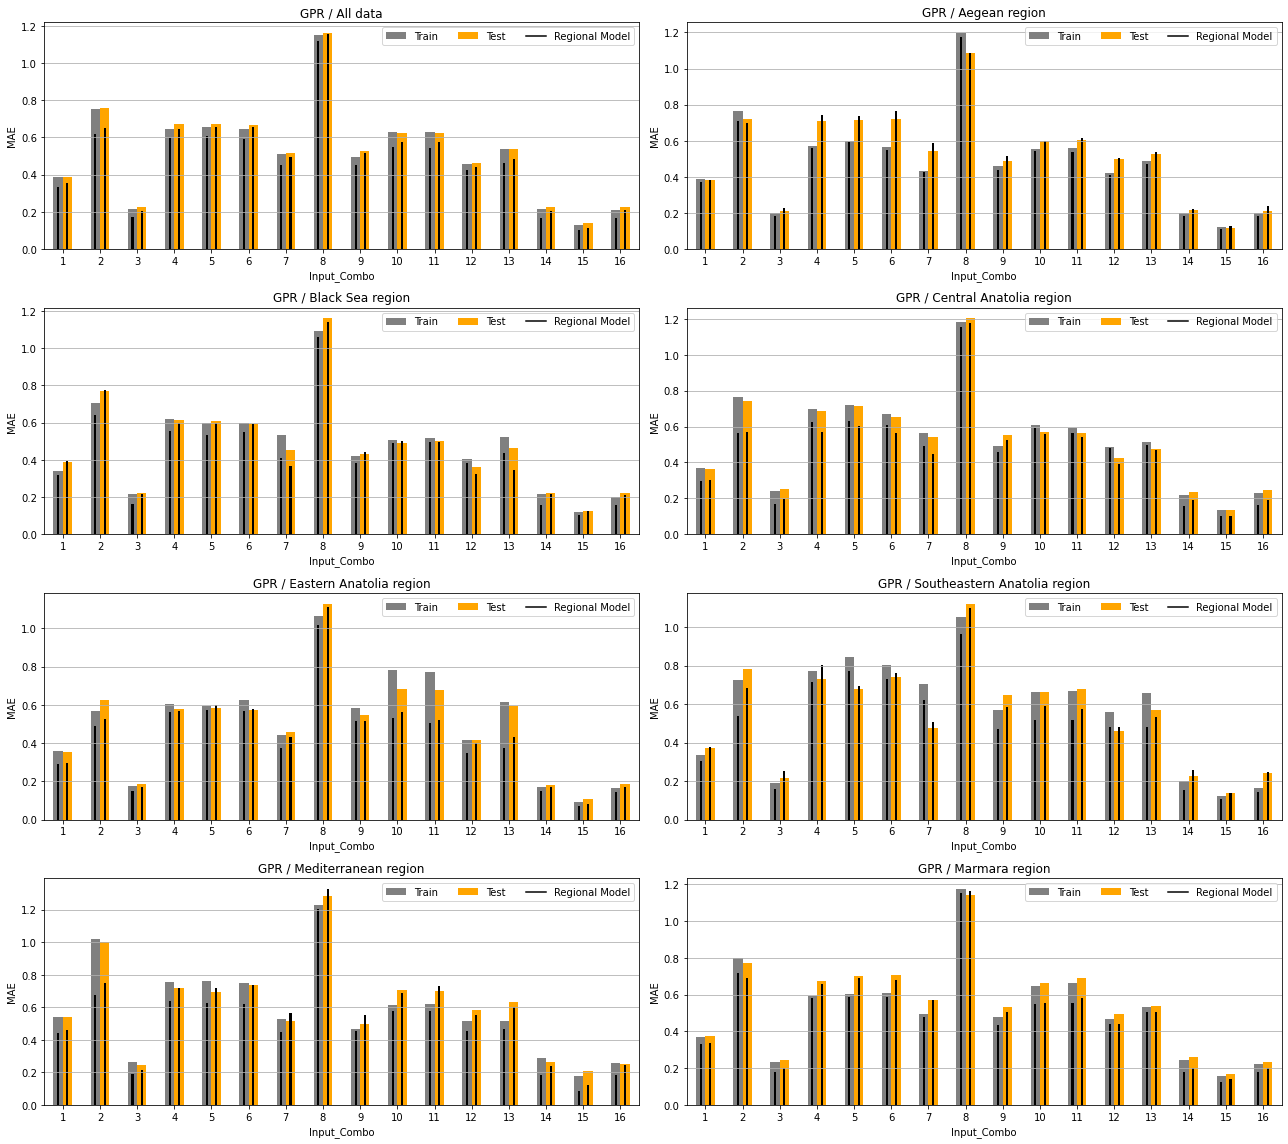

In [3]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithm
algorithm = 'GPR'

by = 'input_combo'

regions = ['all_data', 'Aegean', 'Black Sea', 'Central Anatolia', 'Eastern Anatolia',
           'Southeastern Anatolia', 'Mediterranean', 'Marmara']

fig, axs = plt.subplots(4, 2, figsize=(18, 16), tight_layout=True)
axs = axs.flatten()

for region, ax in zip(regions, axs):
    plot_train_test_scores(metric=metric, algorithm=algorithm, region=region, input_combo=None, by=by, ax=ax)
    
plt.show()

**2. Comparing regions for each input combination:**

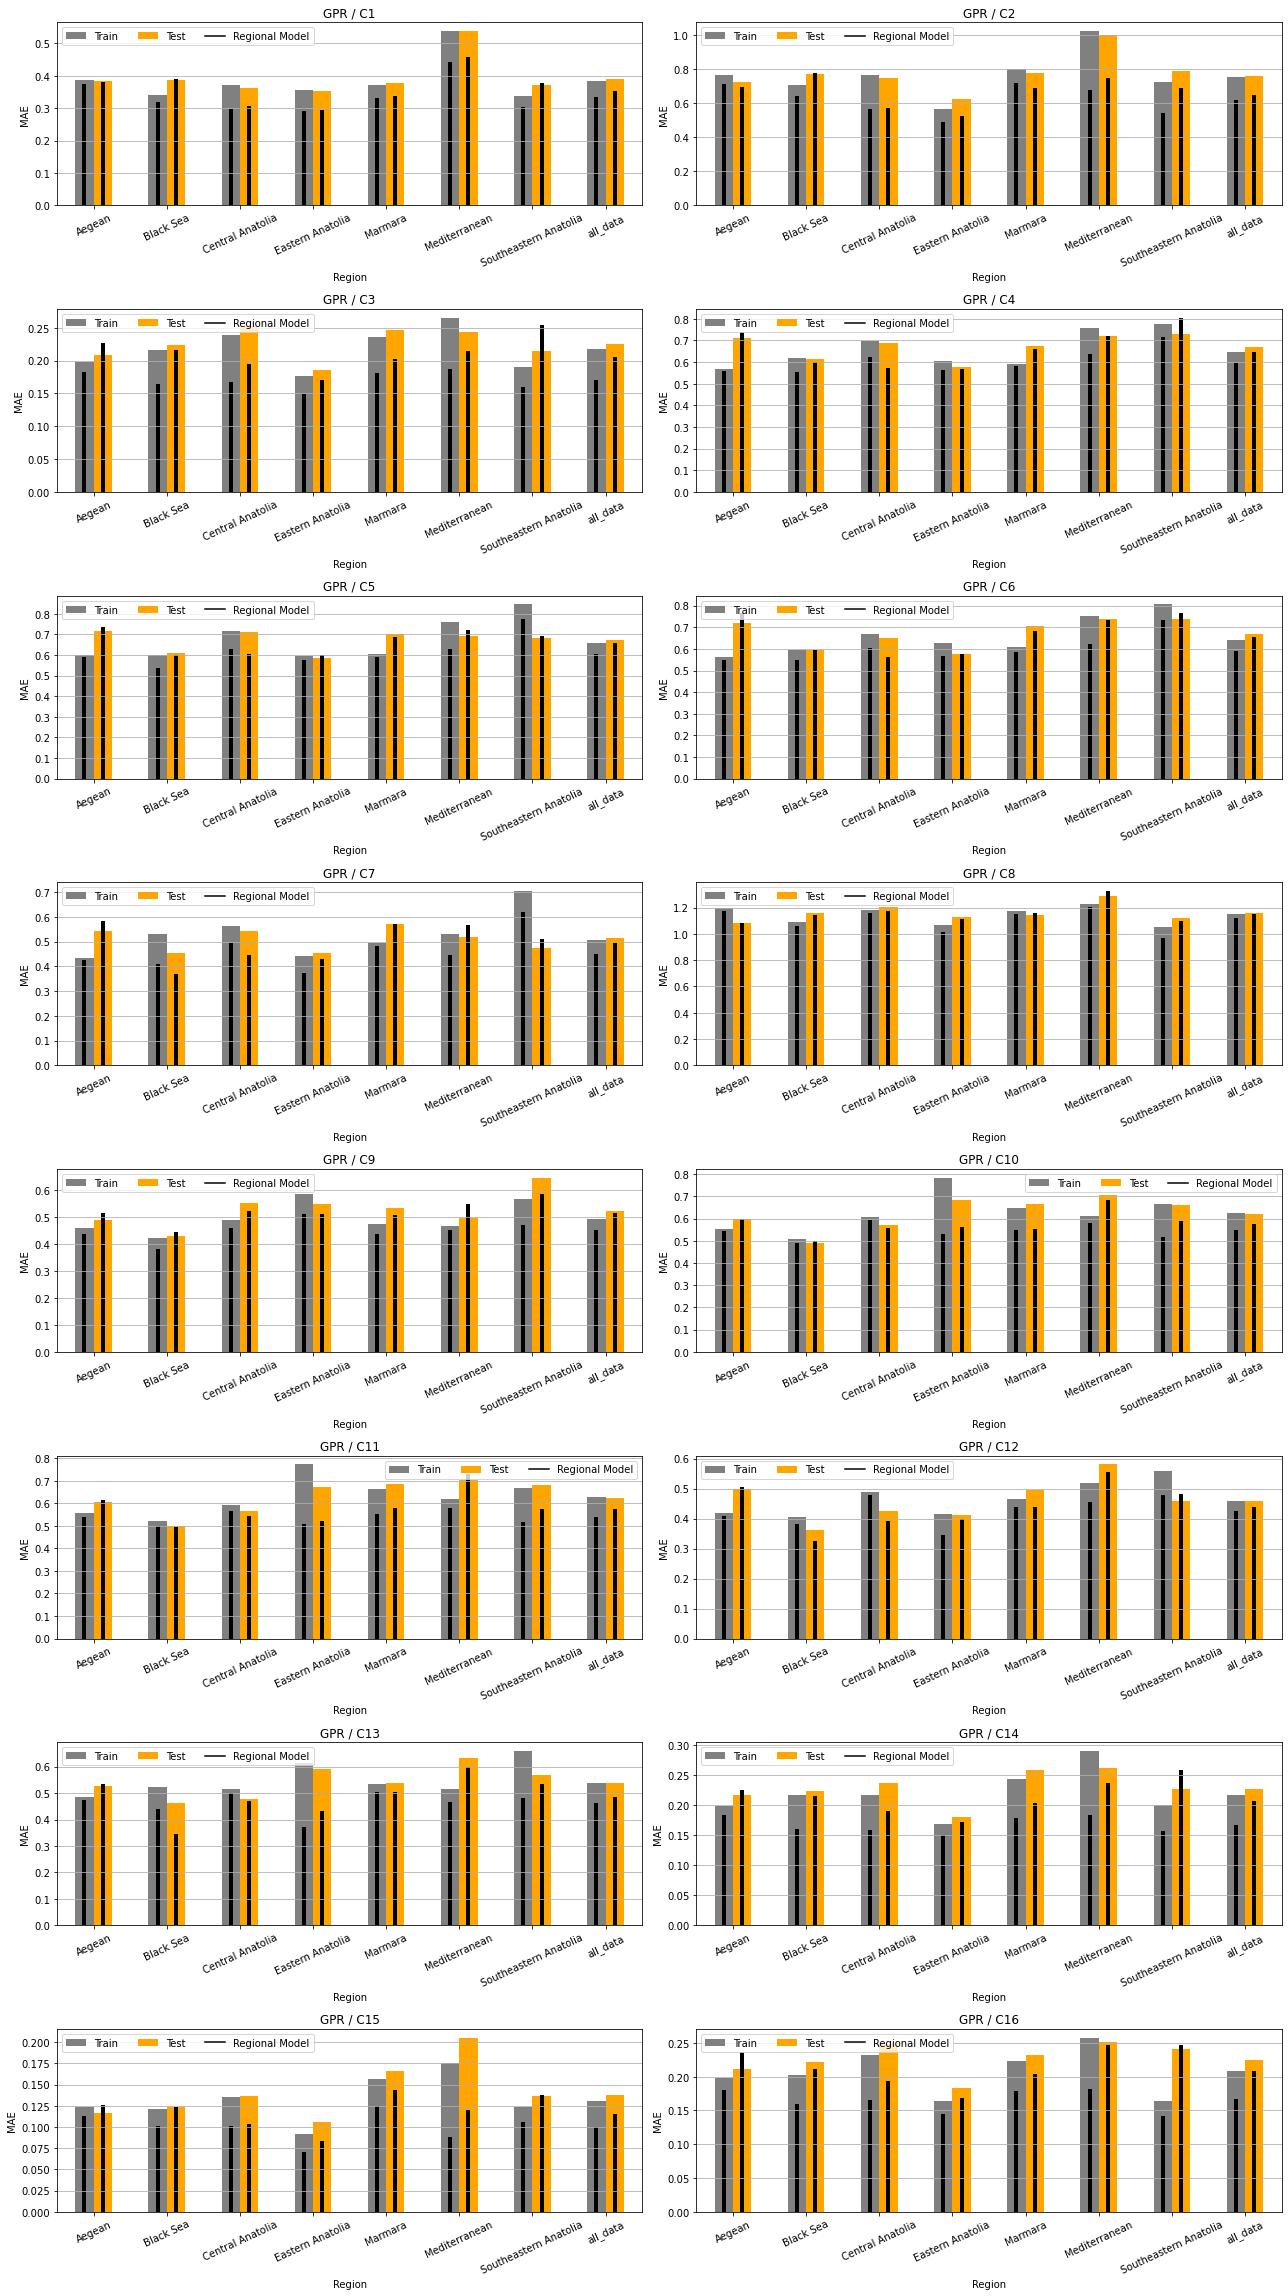

In [4]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithm
algorithm = 'GPR'

by = 'region'

fig, axs = plt.subplots(8, 2, figsize=(18, 32), tight_layout=True)
axs = axs.flatten()

for input_combo, ax in zip(range(1, 17), axs):
    ax = plot_train_test_scores(metric=metric, algorithm=algorithm, region=None, input_combo=input_combo, by=by, ax=ax)
    
plt.show()

##  Comparing algorithm performances
In this section the performance metrics of the algorithms are compared using `plot_algorithm_scores`.

In [5]:
# Run to see plot_algorithm_scores documentation
plot_algorithm_scores?

**1. Comparing input combinations for each region:**

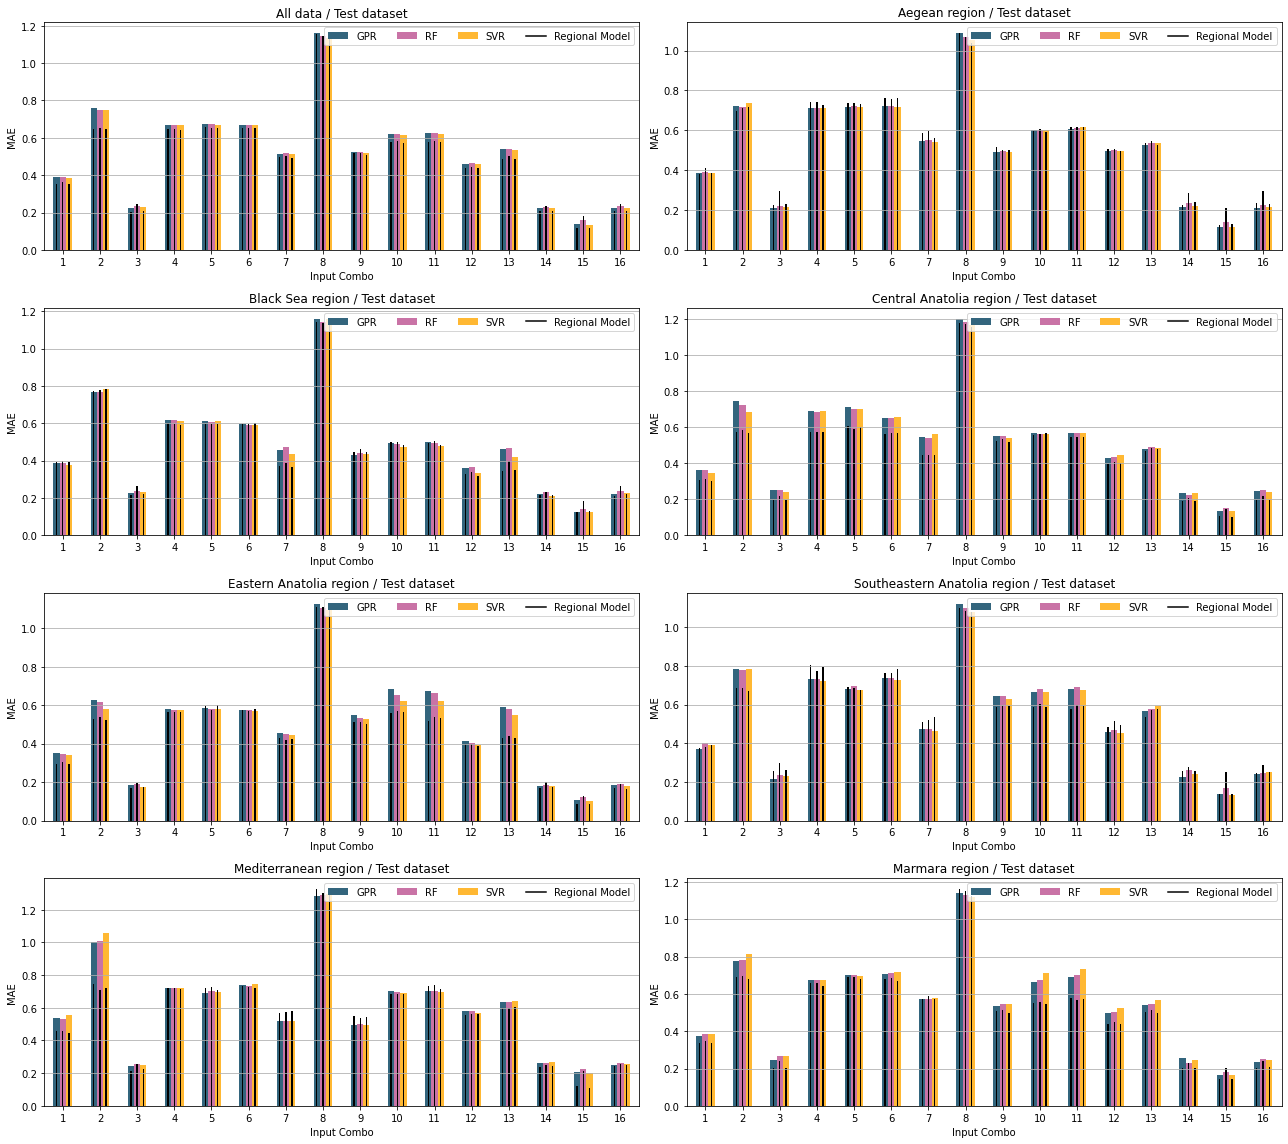

In [6]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithms to be plotted
algorithms = ['GPR', 'RF', 'SVR']

# Define dataset to be plotted
dataset = 'test'

by = 'input_combo'

regions = ['all_data', 'Aegean', 'Black Sea', 'Central Anatolia', 'Eastern Anatolia',
           'Southeastern Anatolia', 'Mediterranean', 'Marmara']

fig, axs = plt.subplots(4, 2, figsize=(18, 16), tight_layout=True)
axs = axs.flatten()

for region, ax in zip(regions, axs):
    plot_algorithm_scores(metric=metric, dataset=dataset, algorithms=algorithms,
                           region=region, input_combo=None, by=by, ax=ax)
    
plt.show()

**2. Comparing regions for each input combination:**

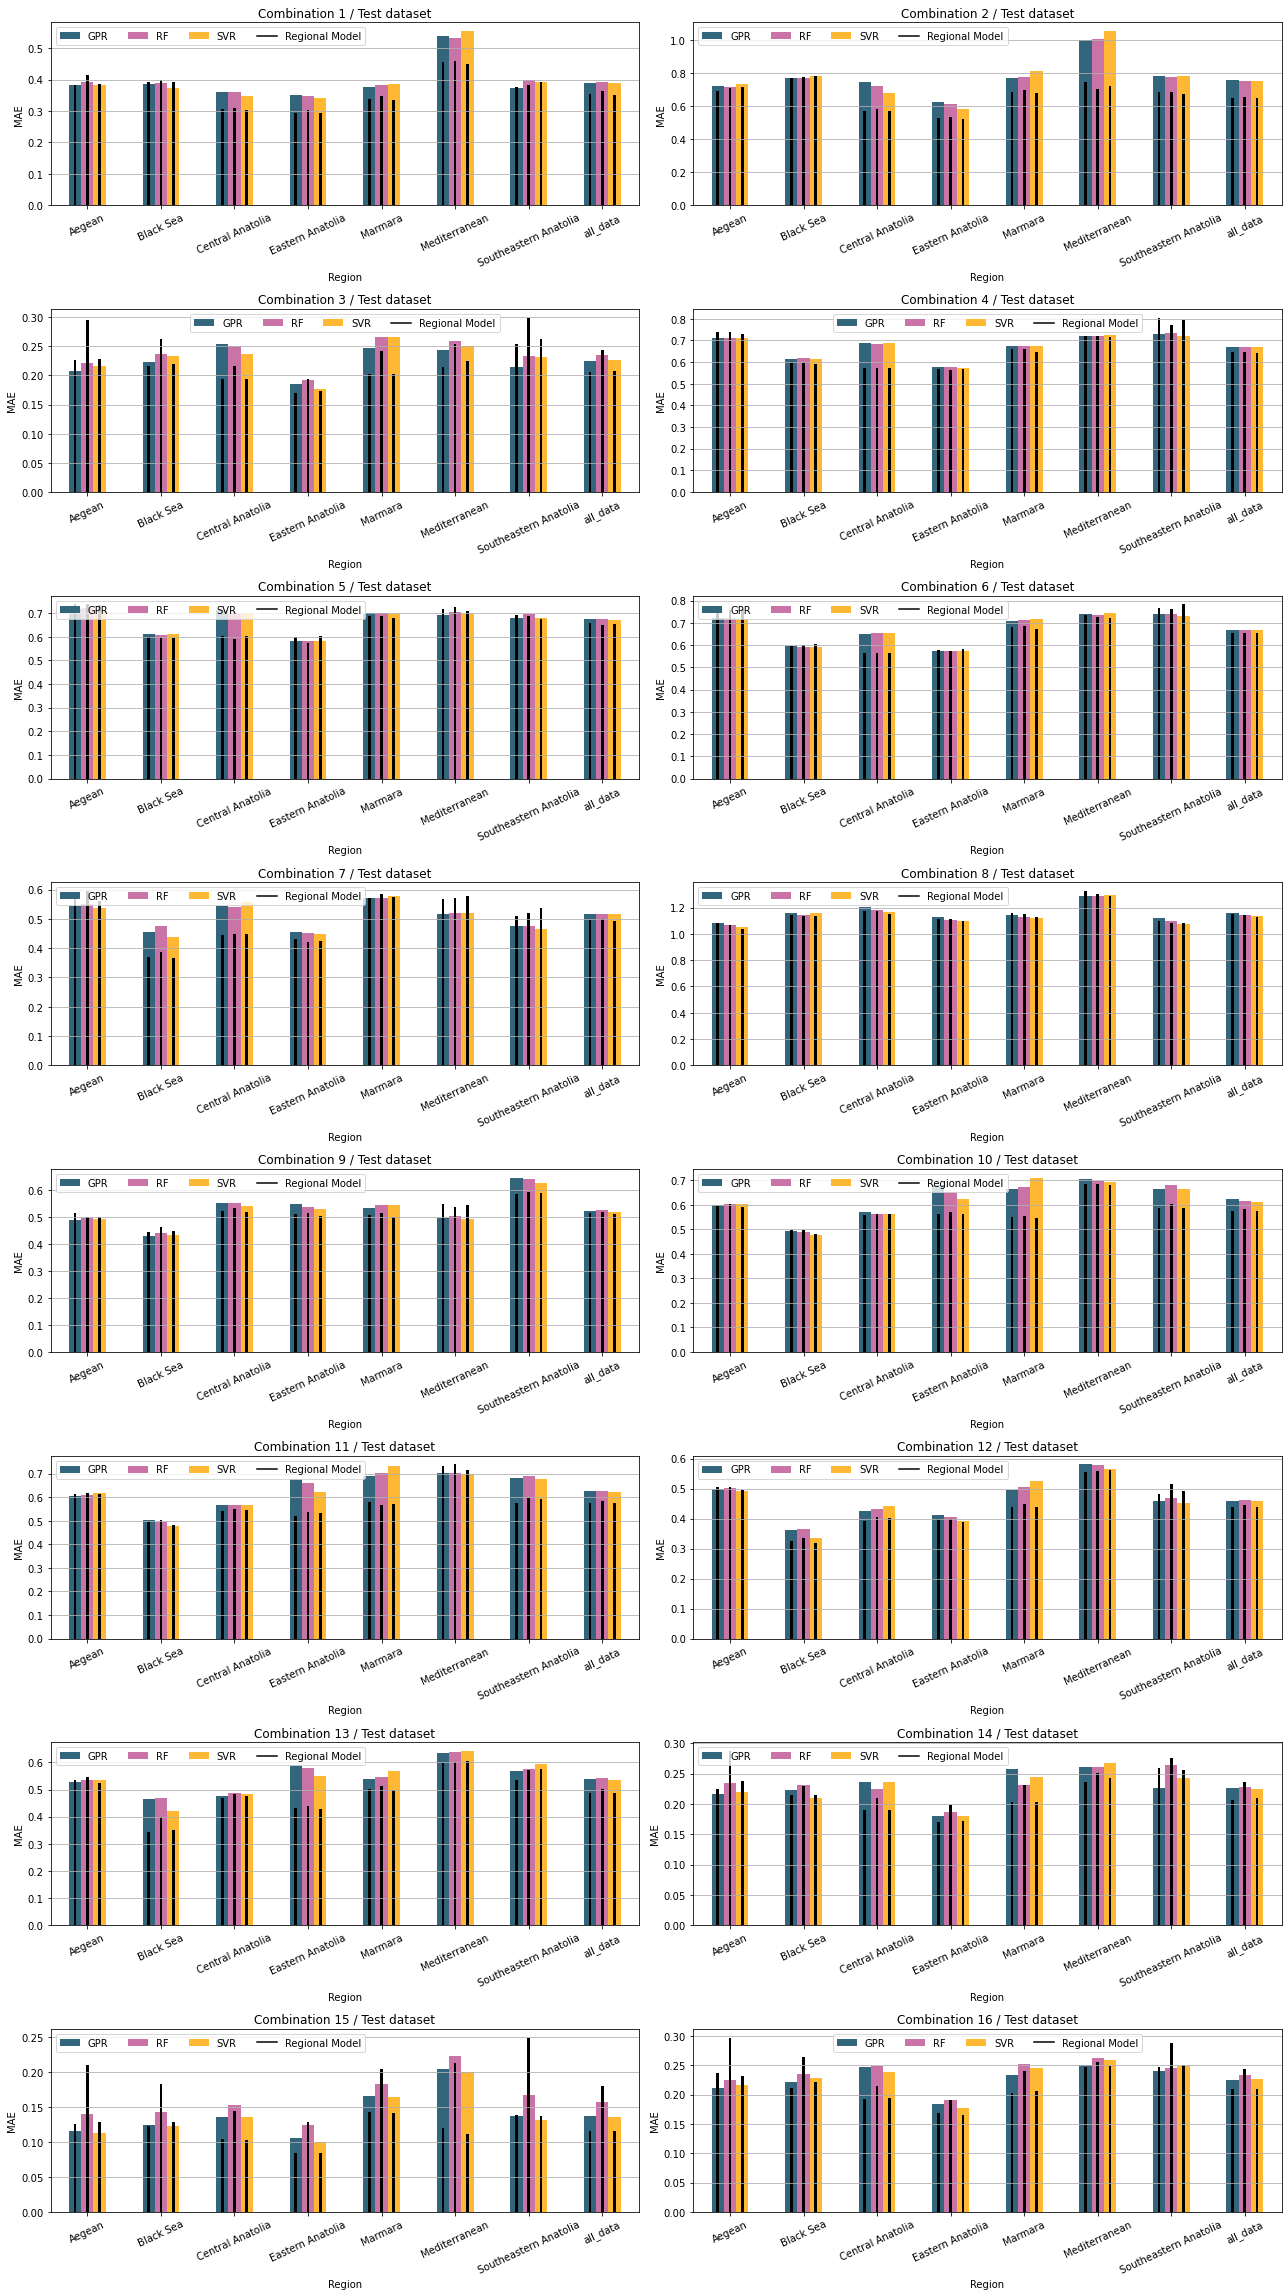

In [7]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithms to be plotted
algorithms = ['GPR', 'RF', 'SVR']

# Define dataset to be plotted
dataset = 'test'

by = 'region'

fig, axs = plt.subplots(8, 2, figsize=(18, 32), tight_layout=True)
axs = axs.flatten()

for input_combo, ax in zip(range(1, 17), axs):
    plot_algorithm_scores(metric=metric, dataset=dataset, algorithms=algorithms,
                           region=None, input_combo=input_combo, by=by, ax=ax)
    
plt.show()

## Plotting change in model performance between regional and general models
In this section the change in model performance between regional and general models is plotted. The change in metric is computed as a percentage of the general model's metric. The function used for these plots is `plot_score_change`.

In [8]:
plot_algorithm_score_change?

**1. Comparing input combinations for each region:**

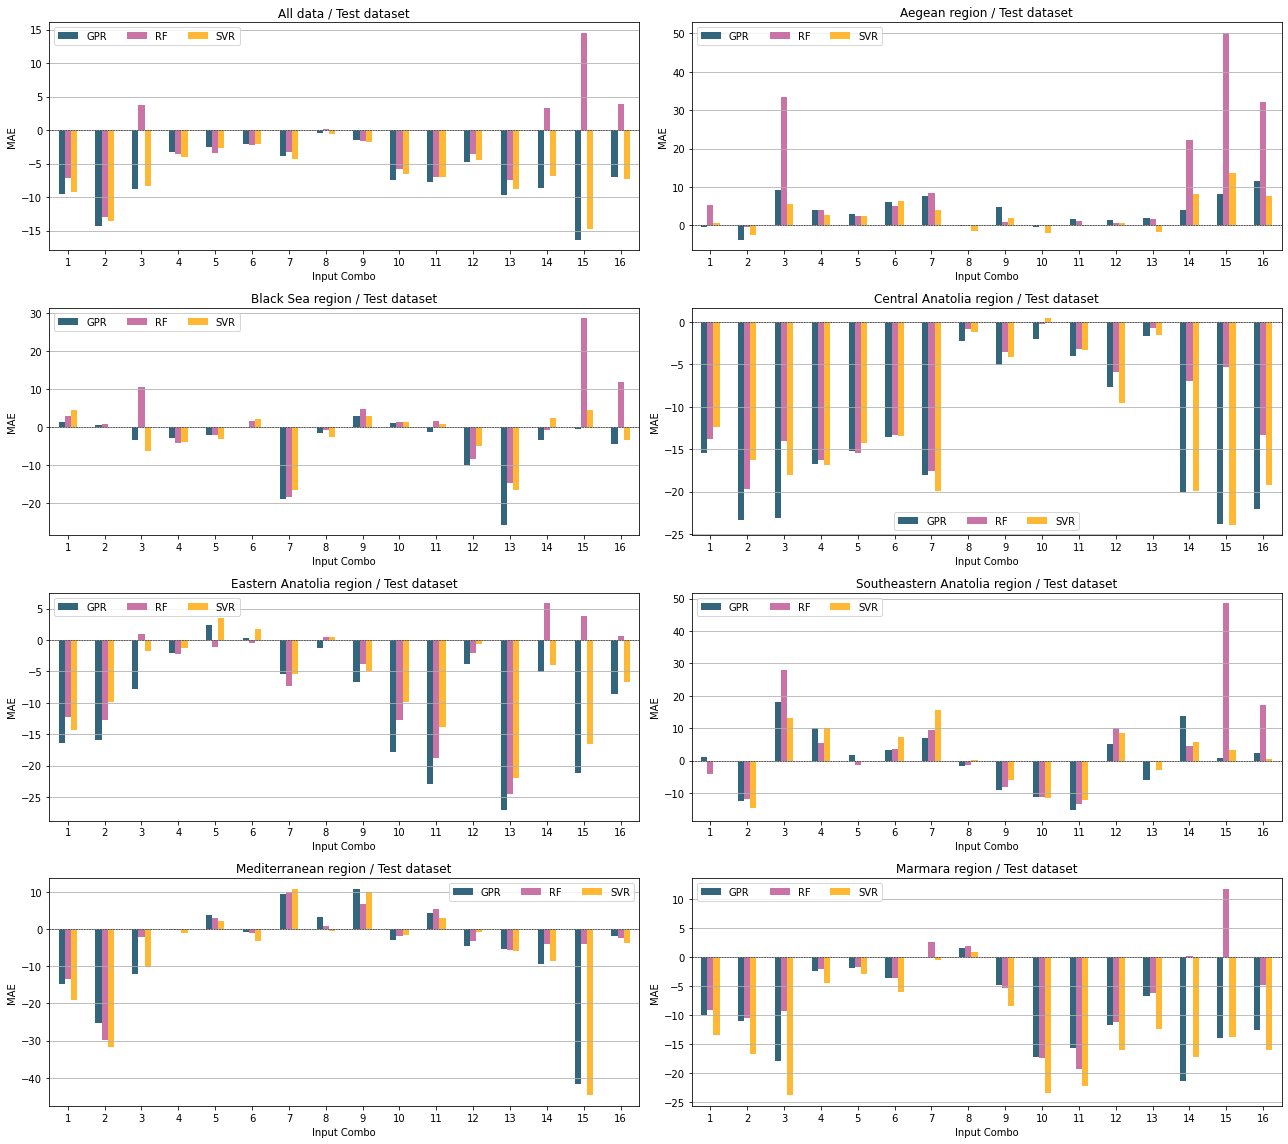

In [9]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithms to be plotted
algorithms = ['GPR', 'RF', 'SVR']

# Define dataset to be plotted
dataset = 'test'

by = 'input_combo'

regions = ['all_data', 'Aegean', 'Black Sea', 'Central Anatolia', 'Eastern Anatolia',
           'Southeastern Anatolia', 'Mediterranean', 'Marmara']

fig, axs = plt.subplots(4, 2, figsize=(18, 16), tight_layout=True)
axs = axs.flatten()

for region, ax in zip(regions, axs):
    plot_algorithm_score_change(metric=metric, dataset=dataset, algorithms=algorithms,
                           region=region, input_combo=None, by=by, ax=ax)
    
plt.show()

**2. Comparing regions for each input combination:**

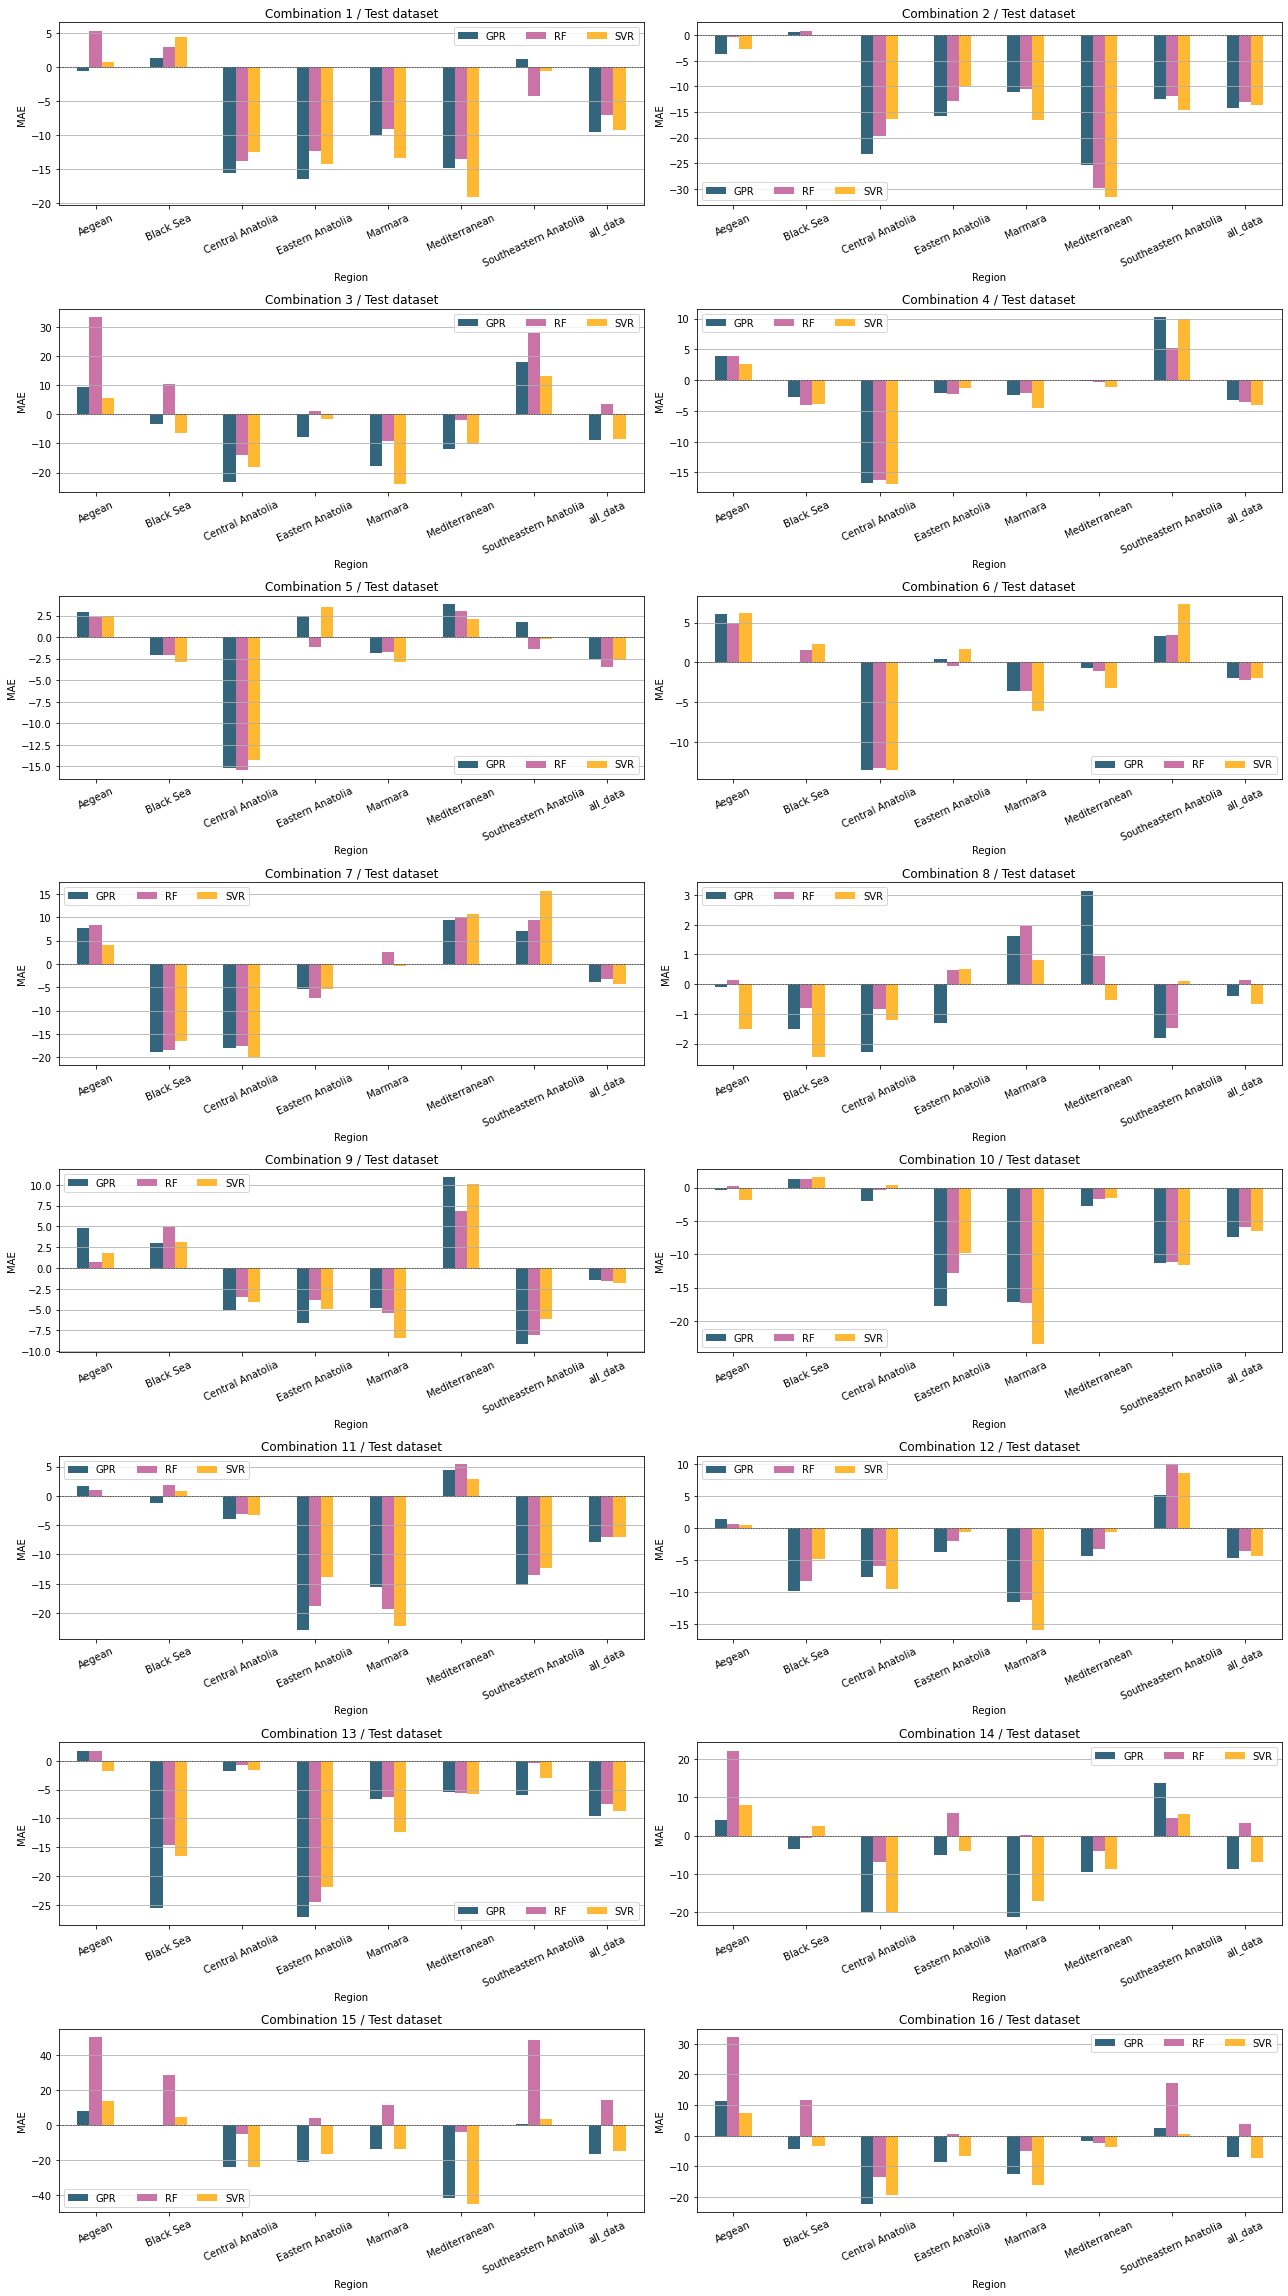

In [10]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithms to be plotted
algorithms = ['GPR', 'RF', 'SVR']

# Define dataset to be plotted
dataset = 'test'

by = 'region'

fig, axs = plt.subplots(8, 2, figsize=(18, 32), tight_layout=True)
axs = axs.flatten()

for input_combo, ax in zip(range(1, 17), axs):
    plot_algorithm_score_change(metric=metric, dataset=dataset, algorithms=algorithms,
                           region=None, input_combo=input_combo, by=by, ax=ax)
    
plt.show()

## Metric change heatmap

C:\Users\HP\Desktop\Git\University-Research\ETProject\ModelEvaluation.py:583: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels(list(map(lambda x: f'{x.get_position()[1]:.0%}', cax.get_yticklabels())))


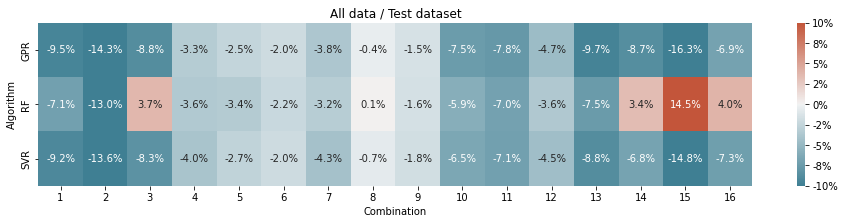

In [11]:
# Define the metric to be plotted
metric = 'MAE'

# Define algorithms to be plotted
algorithms = ['GPR', 'RF', 'SVR']

# Define dataset to be plotted
dataset = 'test'

# Define region
region = 'all_data'

by = 'input_combo'

fig, ax = plt.subplots(figsize=(16, 3))

plot_metric_change_heatmap(metric, dataset, algorithms, region, input_combo=None, by=by, ax=ax)

plt.show()

## Plotting prediction error violin plots
The numbers on the distributions are: Mean (Standard deviation) of the prediction error. Outliers (values less than Q1 - 1.5\*IQR or more than Q3 + 1.5\*IQR) are dropped for better visibility. This can be changed by toggling the `drop_outliers` boolean. Note that the mean and standard deviation of the prediction error are computed before dropping the outliers.

**1. Plotting by algorithm:**

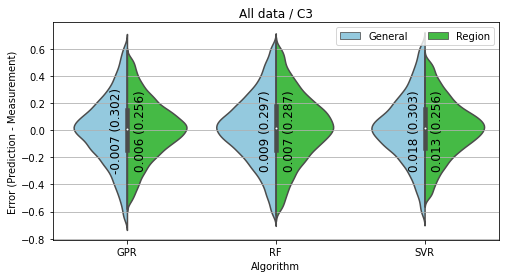

In [12]:
algorithms = ['GPR', 'RF', 'SVR']
region = 'all_data'
input_combo = 3

fig, ax = plt.subplots(figsize=(8, 4))

df = plot_violin_by_algorithm(algorithms,
            region,
            input_combo,
            ax=ax,
            drop_outliers=True,
            verbose=False)

**2. Plotting by region:**

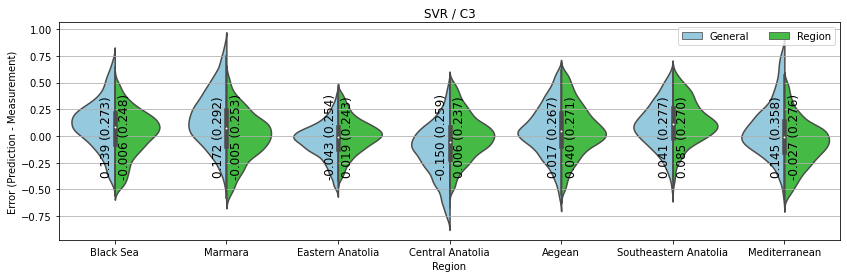

In [13]:
regions = ['Black Sea', 'Marmara', 'Eastern Anatolia', 'Central Anatolia',
           'Aegean', 'Southeastern Anatolia', 'Mediterranean']
algorithm = 'SVR'
input_combo = 3

fig, ax = plt.subplots(figsize=(14, 4))

df = plot_violin_by_region(regions,
            algorithm,
            input_combo,
            ax=ax,
            drop_outliers=True,
            verbose=False)

## Plotting time series
Use the function `plot_station_series` to plot the measured and estimated ET0 time series for a station. There are two ways to use this function:
1. Defining the `st_num`, which will plot this station's time series if found in the defined `dataset`, i.e., train or test dataset.
2. Defining the `region` and setting `st_num` to None, which will plot the time series of a random station from this region's `dataset`.

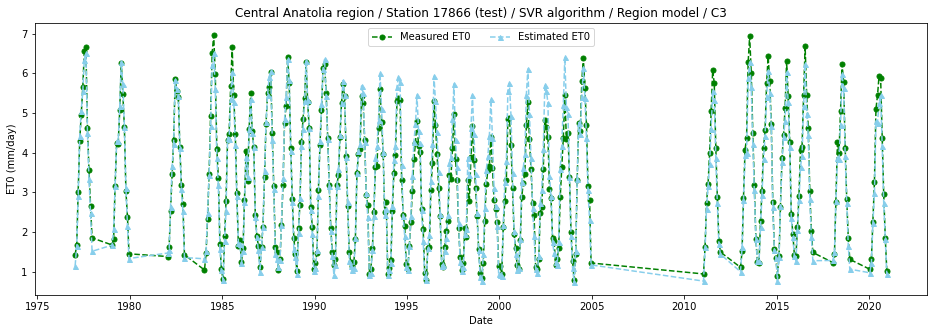

In [14]:
region = 'Central Anatolia'
st_num = None
algorithm = 'SVR'
model = 'region'

plot_station_series(model, algorithm, input_combo, dataset='test', region=region, st_num=st_num, ax=None)